## Vectorization of code

In [1]:
%matplotlib inline

import sys
sys.path.append("/data/ajay/workspace/d2l_ai")
import tensorflow as tf
import math
import numpy as np
import time
from d2l import Timer
import matplotlib.pyplot as plt

In [2]:
n = 10000
a = np.ones(n)
b = np.ones(n)

In [3]:
c = tf.Variable(np.zeros(n))
timer = Timer()
for i in range(n):
    c[i].assign(a[i]+b[i])
f'{timer.stop():.5f} sec'

'3.44102 sec'

In [4]:
timer.start()
d = a+b
f'{timer.stop():.5f} sec'

'0.00022 sec'

## Normal Distribution and Squared Loss

In [5]:
def normal(x,mu,sigma):
    p = 1/math.sqrt(2*math.pi*sigma**2)
    return p*np.exp(-0.5/sigma**2*(x-mu)**2)

Text(0.5, 1.0, 'Normal Distribution')

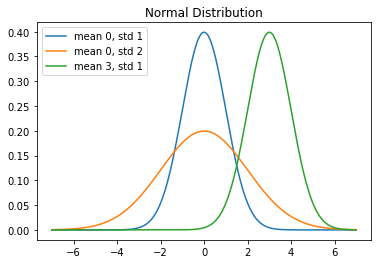

In [6]:
x = np.arange(-7,7,0.01)

params = [(0,1),(0,2),(3,1)]

fig,ax = plt.subplots(1,1)
ax.plot(x,normal(x,params[0][0],params[0][1]))
ax.plot(x,normal(x,params[1][0],params[1][1]))
ax.plot(x,normal(x,params[2][0],params[2][1]))
ax.legend([f'mean {mu}, std {sigma}' for mu,sigma in params])
ax.set_title('Normal Distribution')

## Linear Regression from scratch

In [8]:
%matplotlib inline
import tensorflow as tf
import random

In [13]:
def synthetic_data(w,b,num_examples):
    
    X = tf.zeros((num_examples,w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X,tf.reshape(w,(-1,1)))+b
    y += tf.random.normal(shape=y.shape,stddev=0.01)
    y = tf.reshape(y,(-1,1))
    return X,y

In [14]:
true_w = tf.constant([2,-3.4])
true_b = tf.constant(4.2)

features, labels = synthetic_data(true_w, true_b, 1000)

In [15]:
features[0]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.38064307, -0.3694345 ], dtype=float32)>

In [16]:
labels[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([4.6794987], dtype=float32)>

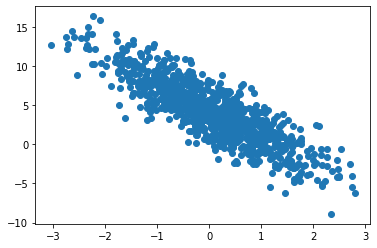

In [19]:
plt.scatter(features[:,1].numpy(),labels.numpy())

In [21]:
def data_iter(batch_size,features,labels):
    
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j = tf.constant(indices[i:min(i+batch_size,num_examples)])
        yield tf.gather(features,j), tf.gather(labels,j)

In [22]:
batch_size = 10

for X,y in data_iter(batch_size,features,labels):
    print (X)
    print (y)
    break

tf.Tensor(
[[ 1.1105527   0.5965332 ]
 [ 0.36670884 -0.2557164 ]
 [-0.20842351  0.46746644]
 [ 1.0515925  -0.2264476 ]
 [ 1.0888836   1.758211  ]
 [-0.5991661   0.5454482 ]
 [ 0.70237595 -1.472746  ]
 [ 0.6227289  -0.54291725]
 [ 0.0882924   1.5931503 ]
 [ 0.3863942   0.14350426]], shape=(10, 2), dtype=float32)
tf.Tensor(
[[ 4.392353 ]
 [ 5.7866387]
 [ 2.1748006]
 [ 7.052718 ]
 [ 0.4049492]
 [ 1.1424134]
 [10.603838 ]
 [ 7.302787 ]
 [-1.0287305]
 [ 4.4887505]], shape=(10, 1), dtype=float32)


In [23]:
w = tf.Variable(tf.random.normal(shape=(2,1),mean=0,stddev=0.01),trainable=True)
b = tf.Variable(tf.zeros(1),trainable=True)

In [24]:
def linreg(X,w,b):
    return tf.matmul(X,w)+b

In [31]:
def squared_loss(y_hat, y):
    return (y_hat - tf.reshape(y,y_hat.shape))**2 / 2

In [32]:
def sgd(params,grads,lr,batch_size):
    for param,grad in zip(params,grads):
        param.assign_sub(lr*grad/batch_size)

In [35]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as tape:
            l = loss(net(X,w,b),y)
        dw, db = tape.gradient(l,[w, b])
        sgd([w, b],[dw, db],lr,batch_size)
    train_l = loss(net(features,w,b),labels)
    print (f'epochs is {epoch} and Training loss is {tf.reduce_mean(train_l)}')

epochs is 0 and Training loss is 4.860179251409136e-05
epochs is 1 and Training loss is 4.857255771639757e-05
epochs is 2 and Training loss is 4.859314867644571e-05


In [36]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [-9.059906e-05  5.030632e-05]
error in estimating b: [-0.0001173]
